# Proyecto Equipo 6

## Proceso ETL

### Información del conjunto de datos a analizar - Avocado -
Conocer el Diccionario de Datos del Dataset.
Nos permite conocer la definición de las columnas.

- Date - The date of the observation
- AveragePrice - the average price of a single avocado
- type - conventional or organic
- year - the year
- Region - the city or region of the observation
- Total Volume - Total number of avocados sold
- 4046 - Total number of avocados with PLU 4046 sold
- 4225 - Total number of avocados with PLU 4225 sold
- 4770 - Total number of avocados with PLU 4770 sold


### Carga del conjunto de datos
Los datos se encuentran en retool para su acceso mediante API.
- Se analiza el tipo de datos.
- Se analiza los nombres de las columnas.

In [27]:
#from google.colab import drive
#drive.mount('/content/gdrive')

# Librerias Empleadas
import httpimport
url = "https://github.com/IsraelUriel/PostworkS8/blob/main/grizzlies.py"
with httpimport.remote_repo(["hello"], url):
    import grizzlies as grz
#import sys    
#path_to_module = '/content/gdrive/My Drive/Colab Notebooks/'
#ys.path.append(path_to_module)
#import grizzlies as grz # Módulo de utilidad

In [15]:
# Carge de datos y resúmen del dataset
# Libreria de Python creada por el equipo 6 de BEDU
df = grz.load_data_api('https://api-generator.retool.com/WcEjun/eq6_avocado', True, 6)

Data normalized
Dataframe Info
-----------------------------------------------------------------------------
      4046       4225   4770     id        Date          type  year  region  \
0  1036.74   54454.85  48.16  0   1  2015-12-27  conventional  2015  Albany   
1   674.28   44638.81  58.33  1   2  2015-12-20  conventional  2015  Albany   
2    794.7  109149.67  130.5  2   3  2015-12-13  conventional  2015  Albany   
3   1132.0   71976.41  72.58  3   4  2015-12-06  conventional  2015  Albany   
4   941.48   43838.39  75.78  4   5  2015-11-29  conventional  2015  Albany   
5  1184.27   48067.99  43.61  5   6  2015-11-22  conventional  2015  Albany   

  Large Bags Small Bags Total Bags XLarge Bags AveragePrice Total Volume  
0      93.25    8603.62    8696.87         0.0         1.33     64236.62  
1      97.49    9408.07    9505.56         0.0         1.35     54876.98  
2     103.14    8042.21    8145.35         0.0         0.93    118220.22  
3     133.76     5677.4    5811.16   

## Proceso ETL: Renombrar
- Se cambian los nombres de las columnas para su mayor comprensión.
- Se analiza el tipo de datos de cada columna.
<br />
#### Cambios de nombre para las columnas:
- 4046 -> plu_4046
- 4525 -> plu_4525
- 4770 -> plu 4770
- '' -> indice_region
- id -> id
- date -> fecha
- type -> tipo
- year -> anio
- Large Bags -> bolsas_largas
- Small Bags -> bolsas_chicas
- Total Bags -> total_bolsas
- XLarge Bags -> bolsas_extra_largas
- AveragePrice -> precio_promedio
- Total Volume -> volumen_total

In [16]:
# Renombrar Columnas
df = grz.rename_columns(df, ['4046','4225','4770','','Date','type','year','Large Bags','Small Bags','Total Bags','XLarge Bags','AveragePrice','Total Volume'],
     ['plu_4046','plu_4525','plu_4770','id_region','fecha','tipo','anio','bolsas_largas','bolsas_chicas','total_bolsas','bolsas_extra_largas','precio_promedio','volumen_total'])

Column Renamed: 4046 to plu_4046
Column Renamed: 4225 to plu_4525
Column Renamed: 4770 to plu_4770
Column Renamed:  to id_region
Column Renamed: Date to fecha
Column Renamed: type to tipo
Column Renamed: year to anio
Column Renamed: Large Bags to bolsas_largas
Column Renamed: Small Bags to bolsas_chicas
Column Renamed: Total Bags to total_bolsas
Column Renamed: XLarge Bags to bolsas_extra_largas
Column Renamed: AveragePrice to precio_promedio
Column Renamed: Total Volume to volumen_total
Dataframe Info
-----------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   plu_4046             100 non-null    object
 1   plu_4525             100 non-null    object
 2   plu_4770             100 non-null    object
 3   id_region            100 non-null    object
 4   id         

## Proceso ETL: Cambiar Tipo de Datos
Se cambia el tipo de dato de cada columna según se requiera.

In [17]:
# Cambiar el tipo de dato específico de una columna
df = grz.recast_columns(df, ['plu_4046','plu_4525','plu_4770','id_region','fecha','tipo','anio','bolsas_largas','bolsas_chicas','total_bolsas','bolsas_extra_largas','precio_promedio','volumen_total'],
     ['float','float','float','int64','date','string','int64','string','float','float','float','float','float','float'])

Column Recasted: plu_4046 to float
Column Recasted: plu_4525 to float
Column Recasted: plu_4770 to float
Column Recasted: id_region to int64
Column Recasted: fecha to date
Column Recasted: tipo to string
Column Recasted: anio to int64
Column Recasted: bolsas_largas to string
Column Recasted: bolsas_chicas to float
Column Recasted: total_bolsas to float
Column Recasted: bolsas_extra_largas to float
Column Recasted: precio_promedio to float
Column Recasted: volumen_total to float
Dataframe Info
-----------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   plu_4046             100 non-null    float64       
 1   plu_4525             100 non-null    float64       
 2   plu_4770             100 non-null    float64       
 3   id_region            100 non-n

## Proceso ETL: Especificar Índice del Dataframe
Se especifica la Columna índice según lo requiera.

In [18]:
# Indicar columna con la llave primaria
grz.set_index(df, 'ID')

"None of ['ID'] are in the columns"


## Proceso ETL Resúmen
Información Detallada del Dataframe rsultante del proceso ETL

In [19]:
# Imprimir reporte de transfomación de datos y resumen del dataset
grz.print_report(df)

DATAFRAME REPORT
-----------------------------------------------------------------------------
DataFrame shape: (100, 15)
-----------------------------------------------------------------------------
Column names: ['plu_4046', 'plu_4525', 'plu_4770', 'id_region', 'id', 'fecha', 'tipo', 'anio', 'region', 'bolsas_largas', 'bolsas_chicas', 'total_bolsas', 'bolsas_extra_largas', 'precio_promedio', 'volumen_total']
-----------------------------------------------------------------------------
Data types:
plu_4046                      float64
plu_4525                      float64
plu_4770                      float64
id_region                       int64
id                              int64
fecha                  datetime64[ns]
tipo                           string
anio                            int64
region                         object
bolsas_largas                  string
bolsas_chicas                 float64
total_bolsas                  float64
bolsas_extra_largas           float64
pr

## Proceso Limpieza de Datos

### Analizar datos si los datos presentan integridad:
- Valores nulos o na
- Valores duplicados
- Valores incosistentes

In [20]:
# Imprimir integridad de datos: Valores repetidos y valores nulos
grz.integrity_report(df)

Integrity Report:
------------------------------------------------------------------------------
NA values:
plu_4046               0
plu_4525               0
plu_4770               0
id_region              0
id                     0
fecha                  0
tipo                   0
anio                   0
region                 0
bolsas_largas          0
bolsas_chicas          0
total_bolsas           0
bolsas_extra_largas    0
precio_promedio        0
volumen_total          0
dtype: int64

------------------------------------------------------------------------------

Duplicate values:0

------------------------------------------------------------------------------

Unique values per column
plu_4046: 100
plu_4525: 100
plu_4770: 100
id_region: 52
id: 100
fecha: 52
tipo: 1
anio: 1
region: 2
bolsas_largas: 100
bolsas_chicas: 100
total_bolsas: 100
bolsas_extra_largas: 26
precio_promedio: 40
volumen_total: 100

-----------------------------------------------------------------------------


### Acciones de limpieza:
- No se encontraron valores nulos.
- No se encontraron filas duplicadas. 
- No se encontraron inconsistencias.
- Se hace chequeo exhaustivo de valores unicos en columna region

In [21]:
# Función que permite ver los valores únicos de cada columna
grz.report_unique(df, ['region'])

-----------------------------------------------------------------------------
Unique values for region:
Albany     52
Atlanta    48
Name: region, dtype: int64


## Proceso EDA
Análisis exploratorio del conjuntos de datos

In [22]:
df = grz.drop_na(df)
df = grz.drop_duplicates(df)

0 NA values dropped
0 Duplicates dropped


Correlation Analysis
-----------------------------------------------------------------------------
Correlation Matrix
-----------------------------------------------------------------------------
                     plu_4046  plu_4525  plu_4770  id_region        id  anio  \
plu_4046             1.000000 -0.529951  0.067266   0.068915  0.891743   NaN   
plu_4525            -0.529951  1.000000  0.137069  -0.423440 -0.653480   NaN   
plu_4770             0.067266  0.137069  1.000000  -0.004417  0.037833   NaN   
id_region            0.068915 -0.423440 -0.004417   1.000000  0.440299   NaN   
id                   0.891743 -0.653480  0.037833   0.440299  1.000000   NaN   
anio                      NaN       NaN       NaN        NaN       NaN   NaN   
bolsas_chicas        0.782900 -0.349528  0.270344  -0.111983  0.694341   NaN   
total_bolsas         0.870700 -0.299713  0.183396  -0.128620  0.761231   NaN   
bolsas_extra_largas  0.292129 -0.155424  0.142966   0.040604  0.294899   NaN   
prec

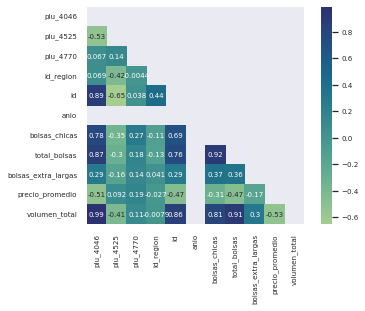

In [23]:
# Análisis de correlación
grz.correlation_analysis(df)

Numeric Analysis
-----------------------------------------------------------------------------
Column: plu_4046
-----------------------------------------------------------------------------


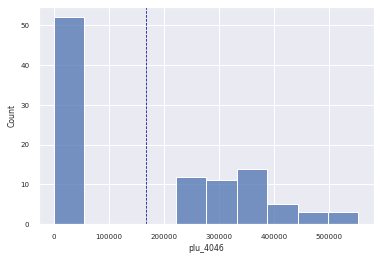

Column: plu_4525
-----------------------------------------------------------------------------


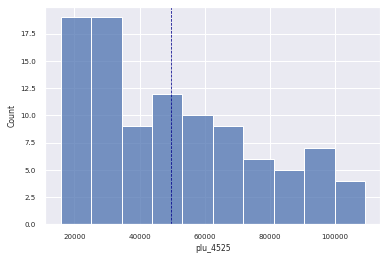

Column: plu_4770
-----------------------------------------------------------------------------


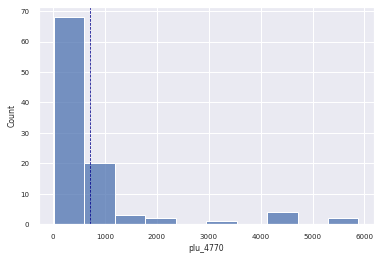

Column: id_region
-----------------------------------------------------------------------------


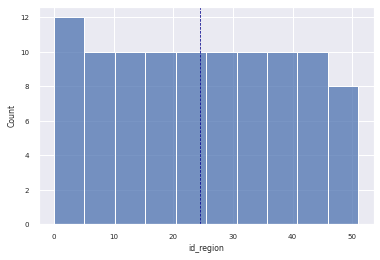

Column: id
-----------------------------------------------------------------------------


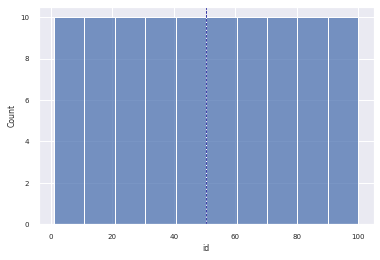

Column: anio
-----------------------------------------------------------------------------


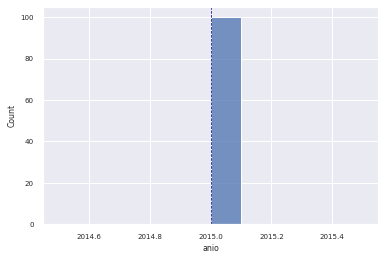

Column: bolsas_chicas
-----------------------------------------------------------------------------


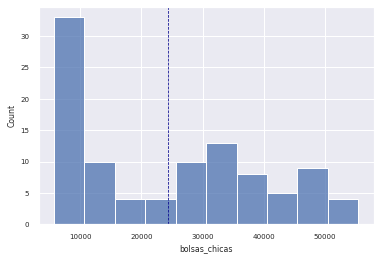

Column: total_bolsas
-----------------------------------------------------------------------------


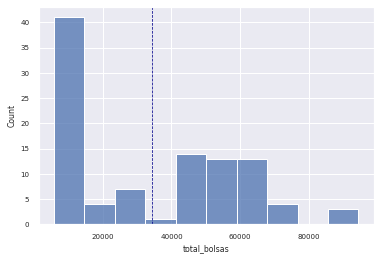

Column: bolsas_extra_largas
-----------------------------------------------------------------------------


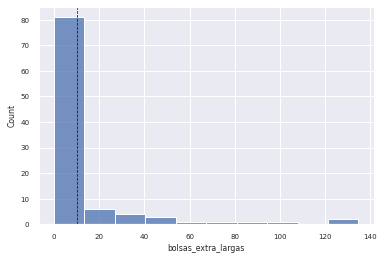

Column: precio_promedio
-----------------------------------------------------------------------------


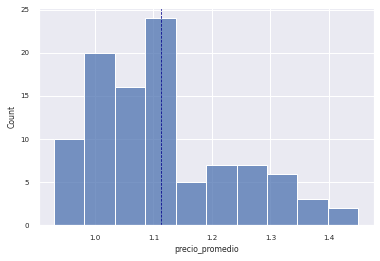

Column: volumen_total
-----------------------------------------------------------------------------


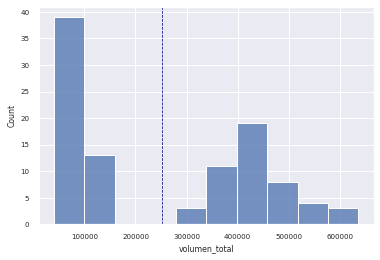

In [24]:
grz.distribution_analysis(df)

Categorical Analysis
-----------------------------------------------------------------------------
Column: region
-----------------------------------------------------------------------------


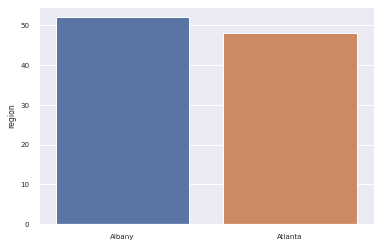

In [25]:
grz.categorical_analysis(df)

In [26]:
grz.check_outliers(df)

Outliers
-----------------------------------------------------------------------------
Column: plu_4046
Lower bound: -496232.75375000003
Upper bound: 829512.57625
Outliers: 0
-----------------------------------------------------------------------------
Column: plu_4525
Lower bound: -28371.186250000006
Upper bound: 126009.66375
Outliers: 0
-----------------------------------------------------------------------------
Column: plu_4770
Lower bound: -784.7825
Upper bound: 1653.7175
Outliers: 9
-----------------------------------------------------------------------------
Column: id_region
Lower bound: -25.5
Upper bound: 74.5
Outliers: 0
-----------------------------------------------------------------------------
Column: id
Lower bound: -48.5
Upper bound: 149.5
Outliers: 0
-----------------------------------------------------------------------------
Column: fecha
Lower bound: 2014-07-23 12:00:00
Upper bound: 2016-06-22 12:00:00
Outliers: 0
----------------------------------------------------